In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.pipeline import make_pipeline


In [135]:
df=pd.read_csv("../data/student-mat.csv",sep=";")
df.sample(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
294,GP,M,18,R,LE3,T,3,2,services,other,...,5,4,2,1,1,4,8,14,13,14
152,GP,F,15,R,GT3,T,3,3,services,services,...,4,2,1,2,3,3,8,10,10,10


In [136]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [137]:
df.drop(columns=['G2','G3'], inplace=True)

In [138]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns
cat_cols, num_cols

(Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
        'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
        'nursery', 'higher', 'internet', 'romantic'],
       dtype='object'),
 Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
        'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1'],
       dtype='object'))

In [139]:
df[num_cols].corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159


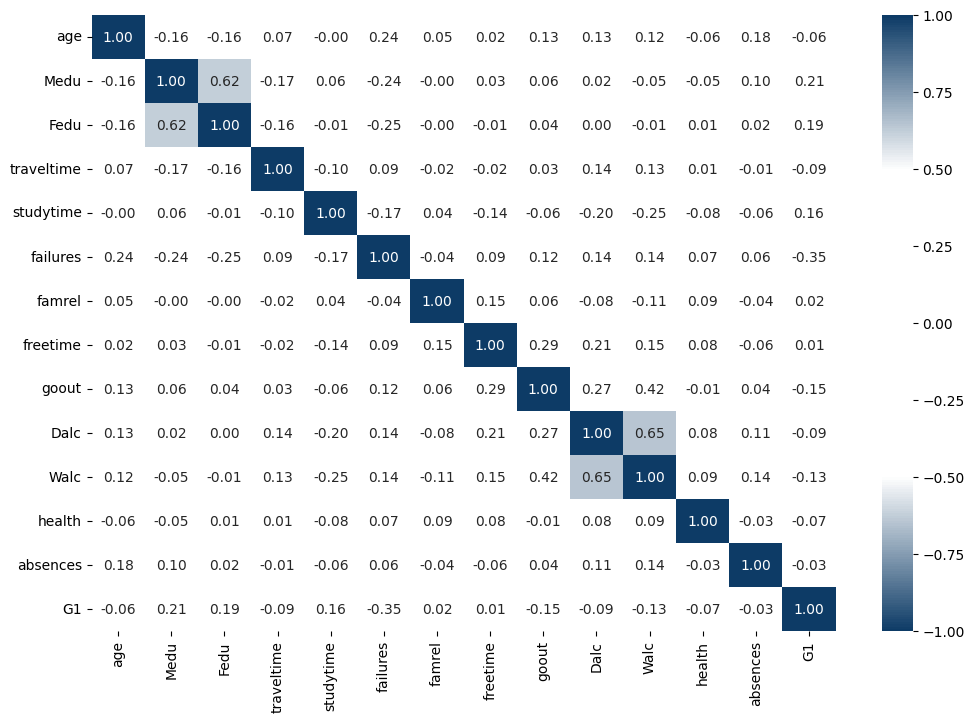

Medu  Fedu    0.623455
Dalc  Walc    0.647544
dtype: float64

In [140]:
from matplotlib.colors import LinearSegmentedColormap
corr_matrix = df[num_cols].corr()
colors = [
    (0.0, "#0D3B66"),
    (0.25, "white"),
    (0.75, "white"),
    (1.0, "#0D3B66")
]
cmap = LinearSegmentedColormap.from_list('', colors)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, vmax=1, vmin=-1)
plt.show()
corr_matrix_filtered = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k =1).astype('bool'))
corr_matrix_filtered = corr_matrix_filtered[corr_matrix_filtered>0.5].stack()
corr_matrix_filtered

In [141]:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype='int8')
df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,0,1,0,1,1,0,1,1,0,0
391,17,3,1,2,1,0,2,4,5,3,...,1,0,0,0,0,0,0,1,1,0
392,21,1,1,1,1,3,5,5,3,3,...,0,1,0,0,0,0,0,1,0,0
393,18,3,2,3,1,0,4,4,1,3,...,1,0,0,0,0,0,0,1,1,0


In [142]:
pipeline = make_pipeline(
    StandardScaler(),
    LinearRegression(),
)
X = df.drop(columns=['G1'])
y = df['G1']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

r2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2, MSE



(0.12069822742695702, 10.17713254927755)

or

In [143]:
from sklearn.linear_model import RidgeCV, LassoCV

In [144]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=7)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(xtrain)
x_test_scaled = scaler.transform(xtest)

In [145]:
ridgeCV = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])
lassoCV = LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1])
ridgeCV.fit(x_train_scaled, ytrain)
lassoCV.fit(x_train_scaled, ytrain)
print("بهترین آلفای Ridge:", ridgeCV.alpha_)
print("بهترین آلفای Lasso:", lassoCV.alpha_)

بهترین آلفای Ridge: 100.0
بهترین آلفای Lasso: 0.1


In [146]:
linear = LinearRegression()
linear.fit(x_train_scaled,ytrain)
linear_preds=linear.predict(x_test_scaled)


ridge = Ridge(alpha=ridgeCV.alpha_)
ridge.fit(x_train_scaled, ytrain)
ridge_preds=ridge.predict(x_test_scaled)

lasso = Lasso(alpha=lassoCV.alpha_)
lasso.fit(x_train_scaled, ytrain)
lasso_preds=lasso.predict(x_test_scaled)


print(f"linear R2: {r2_score(ytest, linear_preds)}, MSE: {mean_squared_error(ytest, linear_preds)}")
print(f"lasso R2: {r2_score(ytest, ridge_preds)}, MSE: {mean_squared_error(ytest, ridge_preds)}")
print(f"ridge R2: {r2_score(ytest, lasso_preds)}, MSE: {mean_squared_error(ytest, lasso_preds)}")



linear R2: 0.12069822742695702, MSE: 10.17713254927755
lasso R2: 0.14790745224476765, MSE: 9.862210077640032
ridge R2: 0.1331913762707222, MSE: 10.032535511370076
